---
title: "Байгалийн шинжлэх ухаан, математик, статистикийн мэргэжлээр төгсөгчдийн тооны хандлага"
author: "Г.Махгал"
author-title: "Зохиогч"
date: 2025-10-14
published-title: "Нийтлэгдсэн"
date-format: "YYYY оны M-р сарын D"
toc: true
toc-depth: 3
toc-title: Агуулга
number-sections: true
crossref: 
  fig-title: Зураг
  fig-prefix: Зураг
  tbl-title: Хүснэгт
  tbl-prefix: Хүснэгт
fig-cap-location: top
tbl-cap-location: top
bibliography: references.bib
csl: ieee.csl
link-citations: true
reference-section-title: "Ашигласан материал"
---

Энэхүү ажлаар Монгол улсын их, дээд сургуулийг байгалийн ухаан, математик, статистикийн мэргэжлээр төгсөгчдийг тоог Үндэсний статистикийн хорооны албан эх сурвалж дээрх өгөгдөлд тулгуурлан авч үзэх бөгөөд улмаар төгсөгчдийн тооны чиг хандлага ба ойрын жилүүдийн прогноз гаргана.

In [152]:
#| echo: false

conclusion = list()

# Шаардлагатай багцууд {-}

Шаардлагатай багцуудыг дараах байдлаар урьдчилан суулгана.

`pip install NSO1212v1 tabulate matplotlib scipy statsmodels`

# Өгөгдөл

Үндэсний статистикийн хороо (ҮСХ) нь 1212.mn @nso_1212mn веб сайтаараа дамжуулан Монгол улсын нийгэм, эдийн засгийн үзүүлэлтийг илэрхийлэх тоон мэдээллийг нээлттэй тархаадаг. Тус веб сайт дээр Монгол улсын их, дээд сургуулийг төгсөгчдийн тоог мэргэжлийн салбар бүрээр, жил жилээр нэгтгэн мэдээлжээ. Бид үүнээс байгалийн ухаан, математик, статистикийн мэргэжлээр төгсөгчдийн тоог авч үзнэ. 

Байгалийн шинжлэх ухаан, математик, статистикийн мэргэжлээр төгсөгчдийн тоог ҮСХ-ны 1212.mn @nso_education_health_2001 веб сайтаас татаж авна.

ҮСХ-ны 1212.mn дээрээс өгөгдөл татахад Python хэлний NSO1212v1 багц @NSO1212v1 ашиглана. Багцыг командын мөрөөс `pip install NSO1212v1` тушаалаар суулгана. Тус багц нь ҮСХ-ны 1212 нээлттэй өгөгдлийн API-ийн хувилбар 1-ийг дэмжинэ.

In [153]:
import NSO1212v1 as nso

ҮСХ-ны нээлттэй өгөгдлийн APIv1 нь өгөгдөл татахад зөвхөн хүснэгтийн ID төдийгүй сектор болон дэд секторын ID-ийг ч шаарддаг.

In [154]:
#| tbl-cap: Үндсэн секторууд, тэдгээрийн ID

nso.sectors()[["id","text"]].rename(columns={"id":"ID","text":"Сектор"})

,ID,Сектор
0,"Education, health","Боловсрол, эрүүл мэнд"
1,Regional development,Бүсчилсэн хөгжлийн үзүүлэлтүүд
2,"Society, development","Нийгэм, хөгжил"
3,Historical data,Түүхэн Статистик
4,"Industry, service","Үйлдвэрлэл, үйлчилгээ"
5,"Labour, business","Хөдөлмөр, бизнес"
6,"Population, household","Хүн ам, өрх"
7,"Economy, environment","Эдийн засаг, байгаль орчин"


Боловсрол, эрүүл мэндийн салбар "Education, health" id-тай байна.

In [155]:
#| tbl-cap: Дэд секторууд, тэдгээрийн ID

nso.subsectors(sector_id="Education, health")[["id","text"]].rename(columns={"id":"ID","text":"Дэд сектор"})

,ID,Дэд сектор
0,General indicators for Education,Боловсролын ерөнхий үзүүлэлт
1,General educational schools,Ерөнхий боловсролын сургууль
2,"Universities, institutes and colleges",Их дээд сургууль
3,Vocational education,Мэргэжлийн боловсрол
4,Disease,Өвчлөл
5,Pre-school education,Сургуулийн өмнөх боловсрол
6,"Births, deaths","Төрөлт, нас баралт"
7,Health insurance,Эрүүл мэндийн даатгал
8,Main indicators for Health sector,Эрүүл мэндийн үндсэн үзүүлэлт


Их дээд сургууль гэсэн дэд салбарын id нь "Universities, institutes and colleges" байна.

Одоо дээрх дэд салбарт хамаарах хүснэгтүүдийн жагсаалтыг авна.

In [156]:
#| tbl-cap: Хүснэгтүүд, тэдгээрийн ID

nso.tables(
  sector_id="Education, health", subsector_id="Universities, institutes and colleges"
)[["id","text"]].rename(columns={"id":"ID","text":"Хүснэгт"})

,ID,Хүснэгт
0,DT_NSO_2001_013V1.px,"ИХ, ДЭЭД СУРГУУЛЬ, КОЛЛЕЖИД СУРАЛЦАГЧИД, хүйс,..."
1,DT_NSO_2001_013V2.px,"ИХ, ДЭЭД СУРГУУЛЬ, КОЛЛЕЖИД СУРАЛЦАГЧИД, мэргэ..."
2,DT_NSO_2001_014V1.px,"ИХ, ДЭЭД СУРГУУЛЬ, КОЛЛЕЖИЙГ ТӨГСӨГЧИД, мэргэж..."
3,DT_NSO_2001_015V2.px,ДЭЭД БОЛОВСРОЛЫН СУРГАЛТЫН БАЙГУУЛЛАГАД СУРАЛЦ...
4,DT_NSO_2001_016V1.px,"ИХ, ДЭЭД СУРГУУЛЬ, КОЛЛЕЖИЙН ҮНДСЭН БАГШИЙН ТО..."
5,DT_NSO_2001_024V1.px,"ИХ, ДЭЭД СУРГУУЛЬ, КОЛЛЕЖИЙГ ТӨГСӨГЧИД, өмчийн..."
6,DT_NSO_2001_024V2.px,"ДОТООДЫН ИХ, ДЭЭД СУРГУУЛЬ, КОЛЛЕЖИЙГ ТӨГСӨГЧИ..."
7,DT_NSO_2001_024V3.px,"ДОТООДЫН ИХ, ДЭЭД СУРГУУЛЬ, КОЛЛЕЖИД СУРАЛЦАГЧ..."


Жагсаалтаас их, дээд сургууль, коллежийг төгсөгчид, мэргэжлийн чиглэлээр гэсэн хүснэгтийн id дугаар нь "DT_NSO_2001_014V1.px" гэж харагдана.

Одоо хүснэгтийн мета мэдээллийг татаж авна.

In [157]:
table_meta_data = nso.table(
  sector_id="Education, health",
  subsector_id="Universities, institutes and colleges",
  table_id="DT_NSO_2001_014V1.px"
)

Мета мэдээллээс мэргэжлийн чиглэл хувьсагчийн утгууд, тэдгээрийн кодыг дараах байдлаар олж харна.

In [158]:
#| tbl-cap: Мэргэжлийн чиглэл хувьсагчийн утгууд, тэдгээрийн код

table_meta_data["variables"][0]["codes"].rename(columns={"values":"Код","valueTexts":"Мэргэжлийн чиглэл"})

,Код,Мэргэжлийн чиглэл
0,0,Бүгд
1,1,Боловсрол
2,2,"Урлаг, хүмүүнлэг"
3,3,"Нийгмийн шинжлэх ухаан, мэдээлэл, сэтгүүл зүй"
4,4,"Бизнес, удирдахуй, хууль, эрх зүй"
5,5,"Байгалийн шинжлэх ухаан, математик, статистик"
6,6,"Мэдээлэл, харилцаа холбооны технологи"
7,7,"Инженер, үйлдвэрлэл, барилга угсралт"
8,8,"Хөдөө аж ахуй, ой, загасны аж ахуй, мал эмнэлэг"
9,9,"Эрүүл мэнд, нийгмийн хамгаалал"


"Байгалийн шинжлэх ухаан, математик, статистик" мэргэжлийн чиглэлийн код "5" байна.

Ийнхүү өгөгдөл татаж авахад шаардлагатай бүх мэдээлэл тодорхой боллоо. Одоо өгөгдөл татаж авна.

In [159]:
data = nso.data(
  sector_id="Education, health",
  subsector_id="Universities, institutes and colleges",
  table_id="DT_NSO_2001_014V1.px",
  query={
    "query": [
      {
        "code": "Мэргэжлийн чиглэл",
        "selection": {
          "filter": "item",
          "values": ["5"]
        }
      }
    ],
    "response": {
      "format": "json-stat2"
    }
  }
)

Тус функц серверээс ирсэн объект доторх өгөгдлийг эцсийн хэрэглэгчдэд таатай байдлаар эмхэлж өгдөг. Тэр нь `df` нэртэй, pandas.DataFrame бүтэцтэй элементэд агуулагдана. Ингээд `data.df` датафреймыг "raw_data.csv" файлд хадгална.

In [160]:
data["df"].to_csv("raw_data.csv", index=False)

Одоо өгөгдлөөс зөвхөн "Он" ба "Хувьсагч" хоёр баганыг ялгаж аваад бусдыг нь гээнэ. Бас хувьсагчдын нэрсийг `year`, `graduates` болгон солино.

In [161]:
import pandas as pd

data = data["df"][["Он","Хувьсагч"]].copy()
data.rename(columns={"Он":"year","Хувьсагч":"graduates"}, inplace=True)
data["year"] = pd.to_numeric(data["year"], errors='coerce')

Ийнхүү ҮСХ-ноос мэдээлсэн байгалийн шинжлэх ухаан, математик, статистик мэргэжлээр жил бүр төгсөгчдийн тоог агуулсан өгөгдөлтэй боллоо.

# Төгсөгчдийн тоо

ҮСХ-ны нээлттэй өгөгдлийн сервисээс татан авсан өгөгдлийг @tbl-data дээр харууллаа.

In [162]:
#| label: tbl-data
#| tbl-cap: Байгалийн шинжлэх ухаан, математик, статистик мэргэжлээр жил бүр төгсөгчдийн тоо

data

,year,graduates
0,2024,424
1,2023,522
2,2022,476
3,2021,767
4,2020,864
5,2019,745


Мөн тус өгөгдлийг шугаман диаграммаар дүрслэв. Үүнийг @fig-graduates-per-year дээрээс харж болно.

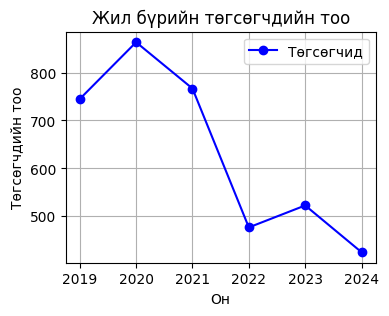

In [163]:
#| label: fig-graduates-per-year
#| fig-cap: Байгалийн шинжлэх ухаан, математик, статистикийн мэргэжлээр төгсөгчдийн тоо

import matplotlib.pyplot as plt

plt.figure(figsize=(4,3))
plt.plot(data["year"], data["graduates"], marker='o', linestyle='-', color='b', label='Төгсөгчид')
plt.xlabel("Он")
plt.ylabel("Төгсөгчдийн тоо")
plt.title("Жил бүрийн төгсөгчдийн тоо")
plt.grid(True)
plt.legend()
plt.show()

Шугаман диаграммаас төгсөгчдийн тоо буурах хандлагатай гэсэн таамаглал гарна.

# Төгсөгчдийн тооны хандлага

Өмнөх хэсэгт байгалийн шинжлэх ухаан, математик, статистикийн мэргэжлээр төгсөгчдийн тоо буурах хандлагатай гэсэн таамаглал дэвшүүлсэн. Одоо түүнийг шалгана. Статистик таамаглал шалгалтын арга зүйн үүднээс хандлага тогтмол гэсэн тэг таамаглалын эсрэг хандлага буурна гэсэн өрсөлдөгч таамаглал дэвшүүлнэ. Улмаар тэг таамаглалыг няцаавал өрсөлдөгч таамаглалыг баталсан явдал болно.

Ийм таамаглалыг корреляц бас регресс гэх мэтчилэн янз бүрийн аргаар шалгаж болохоос корреляцийн коэффициентын тусламжтай шалгах аргыг сонголоо. Энэ тохиолдолд таамаглалыг дараах хэлбэрээр томъёолно.

$$
\begin{array}{l}
H_0: \operatorname{cor}(\text{graduates},\text{year}) = 0 \\
H_1: \operatorname{cor}(\text{graduates},\text{year}) < 0
\end{array}
$$

Мөн түүврийн хэмжээ бага бас тархалт нормал биш тул параметрийн бус корреляц @schober2018 ашиглана.

In [164]:
from scipy import stats

rho, p_one_sided = stats.spearmanr(
  data["year"], data["graduates"],
  alternative="less"                 # корреляц тэгээс бага
)

Корреляц -0.771 гэж гарав. Улмаар $p\text{-value}=0.036<\alpha=0.05$ гэж гарсан нь хандлага буурч байна гэсэн өрсөлдөгч таамаглалыг баталж буй явдал юм.

In [165]:
conclusion.append("Байгалийн шинжлэх ухаан, математик, статистикийн мэргэжлээр төгсөгчдийн тоо буурч байна.")

# Төгсөгчдийн тооны загварчлал

Төгсөгчдийн тооны прогноз гаргахын тулд үүнийг оноос хамааруулан загварчлах шаардлагатай. Прогноз гаргахад хугацаан цувааны загвар эсвэл регрессийн загвар ашигладаг. Ийнхүү төгсөгчдийн тоог жилээс хамааруулсан регрессийн загвар авч үзнэ.

Загвар дахь хамааран хувьсагч нь тоо ширхэг илэрхийлсэн. Энэ байдалд тохирох загвар бол Пуассоны регрессийн загвар @roback2021beyond юм.

In [166]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model_poisson = smf.glm(
  formula="graduates ~ year",
  data=data,
  family=sm.families.Poisson()
).fit()

Гэхдээ Пуассоны регресс overdispersion @roback2021beyond буюу хэт дисперстэй өгөгдөлд тохирохгүй. Өгөгдөл хэт дисперстэй эсэхийг шалгадаг R програмын AER багц дахь `dispersiontest()` @r_aer шиг бэлэн функц байхгүй тул үүнийг "гар аргаар" ажиллуулна.

In [167]:
deviance = model_poisson.deviance
df_resid = model_poisson.df_resid
dispersion = deviance / df_resid

Дисперсийн шинжүүрийн утга 17.166 гэж 1.5 гэсэн босгоос их гарсан тул өгөгдлийг хэт дисперстэй гэж дүгнэнэ.

In [168]:
conclusion.append("Байгалийн шинжлэх ухаан, математик, статистикийн мэргэжлээр төгсөгчдийн тоонд " +
"хэт дисперстэй тархалтын загвар тохирно.")

Хэт дисперстэй хувьсагчийг загварчлах нэг тархалт бол урвасан бином тархалт бөгөөд ийнхүү урвасан бином загвар @roback2021beyond ашиглана.

In [169]:
model_nb = smf.glm(
  formula="graduates ~ year",
  data=data,
  family=sm.families.NegativeBinomial(alpha=1.0)  # alpha: dispersion parameter
).fit()

Прогноз гаргахад шаардлагатай регрессийн загвар бэлэн болсон тул одоо ойрын хэдэн жилийн төгсөгчдийн тооны прогноз гаргах руу чиглэнэ.

# Төгсөгчдийн тооны прогноз

ҮСХ-ны мэдээ 2024 оноор дуусгавар болсон байсан. Иймээс 2025 оноос эхлэн гурван жилийн прогноз гаргана.

In [170]:
#| label: tbl-nb-prediction
#| tbl-cap: Төгсөгчдийн тооны ойрын ирээдүйн прогноз

# Ирээдүйн жилүүд
future_years = pd.DataFrame({
  "year": [2025, 2026, 2027]
})

# Ирээдүйн төгсөгчдийн тоог прогнозлох
future_years["predicted"] = model_nb.predict(future_years)

round(future_years)

,year,predicted
0,2025,378.0
1,2026,329.0
2,2027,286.0


In [171]:
# Ирээдүйн төгсөгчдийн тоо
pred_2027 = round(future_years.loc[future_years["year"] == 2027, "predicted"].values[0])

conclusion.append("Байгалийн шинжлэх ухаан, математик, статистикийн мэргэжлээр төгсөгчдийн тоо " +
f"2027 онд {pred_2027} байна гэсэн прогноз гарсан.")

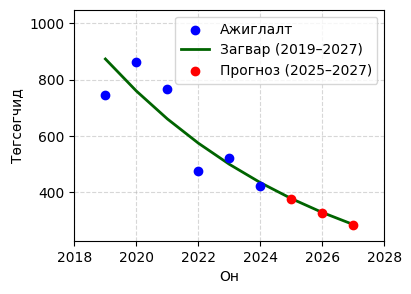

In [172]:
#| label: fig-nb-prediction
#| fig-cap: Төгсөгчдийн тоо ба урвасан бином регресс

# Бүх жил (2019–2027) дэх прогноз
all_years = pd.DataFrame({"year": list(range(2019, 2028))})
all_years["predicted"] = model_nb.predict(all_years)

# Диаграмм
plt.figure(figsize=(4,3))

# Ажиглагдсан утгууд
plt.scatter(data["year"], data["graduates"], color="blue", label="Ажиглалт", zorder=3)

# Загвараар гарсан үнэлгээ (2019–2027)
plt.plot(
  all_years["year"], all_years["predicted"], 
  color="darkgreen", linewidth=2, label="Загвар (2019–2027)"
)

# Ирээдүйн прогноз
future_preds = model_nb.predict(future_years)
plt.scatter(future_years["year"], future_preds, color="red", label="Прогноз (2025–2027)", zorder=4)

# Диаграммын тэнхлэгүүд
plt.xlabel("Он")
plt.ylabel("Төгсөгчид")
plt.xlim(2018, 2028)
plt.ylim(min(data["graduates"].min(), all_years["predicted"].min()) * 0.8,
         max(data["graduates"].max(), all_years["predicted"].max()) * 1.2)

# Legend
plt.legend(loc="upper right")

# Grid
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

# Дүгнэлт {.unnumbered}

In [173]:
from IPython.display import display, Markdown

md_text = "\n".join(f"{i+1}. {t}" for i, t in enumerate(conclusion))

display(Markdown(md_text))

1. Байгалийн шинжлэх ухаан, математик, статистикийн мэргэжлээр төгсөгчдийн тоо буурч байна.
2. Байгалийн шинжлэх ухаан, математик, статистикийн мэргэжлээр төгсөгчдийн тоонд хэт дисперстэй тархалтын загвар тохирно.
3. Байгалийн шинжлэх ухаан, математик, статистикийн мэргэжлээр төгсөгчдийн тоо 2027 онд 286 байна гэсэн прогноз гарсан.